In [1]:
import numpy as np
import pandas as pd

# Loading the Data Set

In [121]:
train_data= pd.read_csv("mnist_train.csv")
train_data.head()

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Loading the Data Set

In [27]:
color_cluster_data= pd.read_csv('cleaned_fruits_with_colors.csv')
color_cluster_data.head()

,fruit_label,mass,width,height,color_score,fruit_name_apple,fruit_name_lemon,fruit_name_mandarin,fruit_name_orange,fruit_subtype_braeburn,fruit_subtype_cripps_pink,fruit_subtype_golden_delicious,fruit_subtype_granny_smith,fruit_subtype_mandarin,fruit_subtype_selected_seconds,fruit_subtype_spanish_belsan,fruit_subtype_spanish_jumbo,fruit_subtype_turkey_navel,fruit_subtype_unknown
0,0,0.405594,0.684211,0.507692,0.55,1,0,0,0,0,0,0,1,0,0,0,0,0,0
1,0,0.363636,0.578947,0.430769,0.59,1,0,0,0,0,0,0,1,0,0,0,0,0,0
2,0,0.349650,0.421053,0.492308,0.60,1,0,0,0,0,0,0,1,0,0,0,0,0,0
3,0,0.356643,0.342105,0.584615,0.92,1,0,0,0,1,0,0,0,0,0,0,0,0,0
4,0,0.335664,0.421053,0.461538,0.89,1,0,0,0,1,0,0,0,0,0,0,0,0,0


In [28]:
color_labels= color_cluster_data.fruit_label

In [29]:
color_cluster_data.drop(columns= ["fruit_label"], index=None, inplace= True)
color_cluster_data.head()

,mass,width,height,color_score,fruit_name_apple,fruit_name_lemon,fruit_name_mandarin,fruit_name_orange,fruit_subtype_braeburn,fruit_subtype_cripps_pink,fruit_subtype_golden_delicious,fruit_subtype_granny_smith,fruit_subtype_mandarin,fruit_subtype_selected_seconds,fruit_subtype_spanish_belsan,fruit_subtype_spanish_jumbo,fruit_subtype_turkey_navel,fruit_subtype_unknown
0,0.405594,0.684211,0.507692,0.55,1,0,0,0,0,0,0,1,0,0,0,0,0,0
1,0.363636,0.578947,0.430769,0.59,1,0,0,0,0,0,0,1,0,0,0,0,0,0
2,0.349650,0.421053,0.492308,0.60,1,0,0,0,0,0,0,1,0,0,0,0,0,0
3,0.356643,0.342105,0.584615,0.92,1,0,0,0,1,0,0,0,0,0,0,0,0,0
4,0.335664,0.421053,0.461538,0.89,1,0,0,0,1,0,0,0,0,0,0,0,0,0


In [30]:
points = np.array([[0.4005,0.5306],
             [0.2148,0.3854],
             [0.3457,0.3156],
             [0.2652,0.1875],
             [0.0789,0.4139],
             [0.4548,0.3022]])
points

array([[0.4005, 0.5306],
       [0.2148, 0.3854],
       [0.3457, 0.3156],
       [0.2652, 0.1875],
       [0.0789, 0.4139],
       [0.4548, 0.3022]])

In [31]:
class AFF_PROB:
    
    def calculate_similarity_matrix(self,  points):
        sim_matrix = np.zeros((points.shape[0],points.shape[0]))
        similarity_measure= {'minus_diff_square': lambda x,y: -1*np.sum((x-y)**2,axis=0)}
        for i in range(points.shape[0]):
            for j in range(points.shape[0]):
                sim_matrix[i,j] = similarity_measure['minus_diff_square'](points[i,:],points[j,:])
                
        if self.self_sim == 'avg':
            m=np.mean(sim_matrix)
            print("Average is {}".format(m))
            np.fill_diagonal(sim_matrix,m)

        elif self.self_sim == 'max':
            m=np.max(sim_matrix)
            print("Max is {}".format(m))
            np.fill_diagonal(sim_matrix,m)

        elif self.self_sim == '0.5min':
            m=np.min(sim_matrix)/2.0
            print("1/2 Min is {}".format(m))
            np.fill_diagonal(sim_matrix,m)
        else: 
            m=np.min(sim_matrix)
            print("Min is {}".format(m))
            np.fill_diagonal(sim_matrix,m)
#         np.fill_diagonal(sim_matrix, np.min(sim_matrix))
        return sim_matrix
    
    def calculate_responsibility_matrix(self, sim_matrix, availability):
        responsiblity_matrix=np.zeros_like(sim_matrix)
        
        for i in range(self.num_points):
            for k in range(self.num_points): 
                step_sim = np.hstack((sim_matrix[i,:k],sim_matrix[i,k+1:]))
                step_availability = np.hstack((availability[i,:k],availability[i,k+1:]))
                responsiblity_matrix[i,k] = sim_matrix[i,k] - np.amax(step_sim + step_availability)
                
        return responsiblity_matrix

    def calculate_availability_matrix(self, availability, responsibility_matrix):
        availability_cpy= np.copy(availability)
        for i in range(self.num_points):
            for k in range(self.num_points):
                if(k == i):
                    step_a = np.hstack((responsibility_matrix[:i,i],responsibility_matrix[i+1:,i]))
                    zero = np.zeros(len(step_a))
                    availability_cpy[i,i] = sum(np.maximum(zero,step_a))
                    continue 

                max_avail = np.hstack((responsibility_matrix[:i,k],responsibility_matrix[i+1:,k]))
                zero = np.zeros(len(max_avail))
                max_avail = np.maximum(max_avail,zero)
                availability_cpy[i,k] = min(0,responsibility_matrix[k,k] + sum(max_avail))
                
        return availability_cpy
    
    def _cluster(self,criterion):
        
        examplars = np.zeros(len(criterion))
        for row in range(len(criterion)):
            examplars[row] = np.argmax(criterion[row,])
            
        clusters = np.unique(examplars)

        return clusters,examplars
    
    def fit(self, points, damping, iters=5, self_sim="min"):
        self.self_sim= self_sim
        self.num_points= points.shape[0]
        similarity_matrix= self.calculate_similarity_matrix(points)
        availability_new = np.zeros((points.shape[0],points.shape[0]))
        responsibility_new = np.zeros((points.shape[0],points.shape[0]))
        
        print ("similarity matrix: ")
        print(similarity_matrix)
        
        for it in range(iters):
            responsibility_old = np.copy(responsibility_new)
            availability_old = np.copy(availability_new)  
            
            print("{}/{}".format(it+1,iters))
            responsibility_new = self.calculate_responsibility_matrix(similarity_matrix,availability_new)
            availability_new= self.calculate_availability_matrix(availability_old,responsibility_new)
            
            
            
            if it != 0: # skip first iteration
                availability_new = damping*availability_old+ (1-damping)*availability_new
                avail_damp = damping*availability_old+ (1-damping)*availability_new
                responsibility_new = damping*responsibility_old+ (1-damping)*responsibility_new
                
            print("Responsibility: ")
            print(responsibility_new)
            
            
            print ("Availability: ")
            print (availability_new)
        
           
        
        print ("final matrix: ")
        print(availability_new + responsibility_new)
        print("#######################################################")
        
        self.criterion = availability_new + responsibility_new
        clusters, examplar= self._cluster(self.criterion)
        return clusters, examplar

In [32]:
np.array(color_cluster_data).shape

(54, 18)

# Trying different Self-similarity measures

In [214]:
num_classes = 10
new_train_data= pd.DataFrame()
for i in range (num_classes):
    new_train_data= new_train_data.append( train_data[train_data["label"]==i].iloc[0:12,:], ignore_index=True)


C:\Users\Mahmoud Elshinawy\AppData\Local\Temp\ipykernel_25676\3570963165.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_train_data= new_train_data.append( train_data[train_data["label"]==i].iloc[0:12,:], ignore_index=True)


In [215]:
new_train_data.head()

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [216]:
new_train_label= new_train_data.label
new_train_data.drop(columns=["label"], index=None, inplace= True)

In [217]:
new_train_data.head()

,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,1x10,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# MIN (minimum in similarity table)

In [218]:
min_model= AFF_PROB()
min_clusters, min_examplars= model.fit(points=np.array(new_train_data), damping=0.8, iters=80, self_sim="min")

Min is -11961445.0
similarity matrix: 
[[-11961445.  -1926560.  -5477078. ...  -7075061.  -6579773.  -7573484.]
 [ -1926560. -11961445.  -6355252. ...  -7240829.  -7343825.  -8217272.]
 [ -5477078.  -6355252. -11961445. ...  -6442003.  -5910919.  -8008012.]
 ...
 [ -7075061.  -7240829.  -6442003. ... -11961445.  -7218454.  -6589303.]
 [ -6579773.  -7343825.  -5910919. ...  -7218454. -11961445.  -4904045.]
 [ -7573484.  -8217272.  -8008012. ...  -6589303.  -4904045. -11961445.]]
1/80
Responsibility: 
[[-10034885.   1452955.  -3550518. ...  -5148501.  -4653213.  -5646924.]
 [  1943644. -10034885.  -4428692. ...  -5314269.  -5417265.  -6290712.]
 [ -3253521.  -4131695.  -9737888. ...  -4218446.  -3687362.  -5784455.]
 ...
 [ -4196506.  -4362274.  -3563448. ...  -9082890.  -4339899.  -3710748.]
 [ -4700772.  -5464824.  -4031918. ...  -5339453. -10082444.  -3025044.]
 [ -4520329.  -5164117.  -4954857. ...  -3536148.  -1850890.  -8908290.]]
Availability: 
[[  1943644. -10034885.  -9320487. .

Responsibility: 
[[ -5251536.29728    -33964344.47686399 -37895745.91238399 ...
  -39493728.91238399 -38998440.91238399 -39992151.91238399]
 [-28016503.96486399  -5251536.29728    -32954710.57759999 ...
  -33840287.57759999 -33943283.57759999 -34816730.57759999]
 [-40005533.33510399 -40883707.33510399  -5330257.019776   ...
  -40970458.33510399 -40439374.33510399 -42536467.33510399]
 ...
 [-44162695.90630398 -44328463.90630399 -43529637.90630399 ...
   -5176761.624192   -44306088.90630399 -43676937.90630399]
 [-47063397.83628799 -47827449.83628798 -46394543.83628798 ...
  -47702078.83628799  -5253338.616768   -45387669.83628798]
 [-43524798.099392   -44168586.09939198 -43959326.09939198 ...
  -42540617.09939199 -40855359.09939199  -5016954.708352  ]]
Availability: 
[[33297719.492608 -5251536.29728  -5158367.82272  ... -5112880.801408
  -5190953.980864 -4943421.088128]
 [-5251536.29728  28668078.260224 -5158367.82272  ... -5112880.801408
  -5190953.980864 -4943421.088128]
 [-4742021.684

Responsibility: 
[[ -5174282.79730966 -14696417.51973795 -18346781.8270589  ...
  -19944764.8270589  -19449476.8270589  -20443187.8270589 ]
 [-11362285.71372711  -5125274.28530966 -15924543.91236818 ...
  -16810120.91236818 -16913116.91236817 -17786563.91236818]
 [-19504469.10009482 -20382643.10009482  -4937462.40357778 ...
  -20469394.10009482 -19938310.10009482 -22035403.10009482]
 ...
 [-22631943.4995577  -22797711.4995577  -21998885.4995577  ...
   -4956526.63624382 -22775336.4995577  -22146185.4995577 ]
 [-24028606.56358887 -24792658.56358886 -23359752.56358887 ...
  -24667287.56358887  -4982350.74105815 -22352878.56358886]
 [-22489366.26153977 -23133154.26153976 -22923894.26153976 ...
  -21505185.26153976 -19819927.26153977  -4733094.95532194]]
Availability: 
[[ 9892651.50305606 -3770103.09089542 -4892402.68190473 ...
  -4939780.66183593 -4965996.98306374 -4713818.55798194]
 [-4017384.29089542  8870335.9018624  -4892402.68190473 ...
  -4939780.66183593 -4965996.98306374 -4713818.

Responsibility: 
[[-6807058.14937565 -3247609.82727324 -6824301.93765958 ...
  -8422284.93765958 -7926996.93765958 -8920707.93765958]
 [-1251236.09990812 -6947965.55206518 -6048675.05658068 ...
  -6934252.05658068 -7037248.05658068 -7910695.05658068]
 [-6020170.16345591 -6898344.16345591 -6512835.95477135 ...
  -6985095.16345591 -6454011.16345591 -8551104.16345591]
 ...
 [-7919337.24946856 -8085105.24946856 -7286279.24946856 ...
  -6066035.9852326  -8062730.24946856 -7433579.24946856]
 [-8763917.55522693 -9527969.55522692 -8095063.55522693 ...
  -9402598.55522693 -6310520.96770445 -7088189.55522692]
 [-8193371.10293556 -8837159.10293556 -8627899.10293556 ...
  -7209190.10293556 -5523932.10293556 -5962406.61454078]]
Availability: 
[[ 8676212.81478168 -3049915.09786578 -3342024.93456763 ...
  -2708032.34460759 -2745645.2097329  -2335416.0423691 ]
 [-2178179.45723309  6478635.18557333 -3342024.93456763 ...
  -2708032.34460759 -2745645.2097329  -2335416.0423691 ]
 [-1016296.23645838 -24769

Responsibility: 
[[-7466687.71364669   575847.26954436 -2981532.11644875 ...
  -4579515.11644876 -4084227.11644875 -5077938.11644875]
 [ 2122771.85865665 -7115951.62721466 -2743644.87735837 ...
  -3629221.87735837 -3732217.87735837 -4605664.87735837]
 [-2768416.76395639 -3646590.76395639 -7682095.24230698 ...
  -3733341.76395639 -3202257.76395639 -5299350.76395639]
 ...
 [-3699664.76108347 -3865432.76108347 -3066606.76108347 ...
  -6819280.7071756  -3843057.76108347 -3213906.76108347]
 [-4489411.23080114 -5253463.23080114 -3820557.23080114 ...
  -5128092.23080114 -7817167.01099365 -2813683.23080114]
 [-4988445.29855568 -5632233.29855568 -5422973.29855568 ...
  -4004264.29855568 -2319006.29855568 -7641294.69532592]]
Availability: 
[[ 6844884.98505212 -3715758.30330257 -5030372.13294412 ...
  -3025934.89001823 -4419614.05800692 -5536203.16035133]
 [-4133562.97967065  5503866.82783845 -5030372.13294412 ...
  -3025934.89001823 -4419614.05800692 -5536203.16035133]
 [-1428092.65749411 -21383

Responsibility: 
[[-7960376.18866801  1552226.20852563 -2000090.46264415 ...
  -3598073.46264415 -3102785.46264415 -4096496.46264415]
 [ 2706733.45505388 -7119442.58098637 -1836705.45814404 ...
  -2722282.45814404 -2825278.45814404 -3698725.45814404]
 [-2610239.47140987 -3488413.47140987 -8682859.89959061 ...
  -3575164.47140987 -3044080.47140987 -5141173.47140987]
 ...
 [-1962399.00013305 -2128167.00013305 -1329341.00013305 ...
  -6385635.35540942 -2105792.00013305 -1476641.00013305]
 [-4160682.38896351 -4924734.38896351 -3491828.38896351 ...
  -4799363.38896351 -9003932.57543829 -2484954.38896351]
 [-4513347.22659413 -5157135.22659413 -4947875.22659413 ...
  -3529166.22659413 -1843908.22659413 -8446459.13047707]]
Availability: 
[[ 6300739.62206205 -4076519.71628776 -7383446.02567191 ...
  -2518319.18298574 -6944620.32864749 -7778206.91984521]
 [-4730484.99480223  4995659.55361007 -7383446.02567191 ...
  -2518319.18298574 -6944620.32864749 -7778206.91984521]
 [-1871000.6337274  -22617

Responsibility: 
[[-8173881.73336368  1724090.01600625 -1826899.49484888 ...
  -3424882.49484888 -2929594.49484888 -3923305.49484888]
 [ 2775727.41068015 -7204445.78667158 -1683044.80413321 ...
  -2568621.80413321 -2671617.80413321 -3545064.80413321]
 [-2772566.07308935 -3650740.07308935 -9148996.17976636 ...
  -3737491.07308935 -3206407.07308935 -5303500.07308935]
 ...
 [-1582883.65186206 -1748651.65186206  -949825.65186206 ...
  -6347856.27568363 -1726276.65186206 -1097125.65186206]
 [-4432134.09947076 -5196186.09947077 -3763280.09947077 ...
  -5070815.09947077 -9672662.05158601 -2756406.09947076]
 [-4471221.97026505 -5115009.97026505 -4905749.97026505 ...
  -3487040.97026505 -1801782.97026505 -8739947.00881254]]
Availability: 
[[ 6771280.39069899 -3743627.21050938 -8448563.14610117 ...
  -2511016.54300389 -8298366.38232686 -8444083.52522907]
 [-4273779.30886428  5289900.01153872 -8448563.14610117 ...
  -2511016.54300389 -8298366.38232686 -8444083.52522907]
 [-1458009.16467617 -19507

Responsibility: 
[[-8251894.11470703  1747099.8981198  -1803541.7056218  ...
  -3401524.7056218  -2906236.7056218  -3899947.7056218 ]
 [ 2771770.5783492  -7248772.05085737 -1664806.76948283 ...
  -2550383.76948283 -2653379.76948283 -3526826.76948283]
 [-2868541.82320599 -3746715.82320599 -9324613.81424273 ...
  -3833466.82320599 -3302382.82320599 -5399475.82320599]
 ...
 [-1511622.46586148 -1677390.46586148  -878564.46586148 ...
  -6366179.20206456 -1655015.46586148 -1025864.46586148]
 [-4597043.04786831 -5361095.04786831 -3928189.04786831 ...
  -5235724.04786831 -9941714.9825796  -2921315.04786831]
 [-4435039.2324703  -5078827.2324703  -4869567.2324703  ...
  -3450858.2324703  -1765600.2324703  -8791743.24059129]]
Availability: 
[[ 7051614.65326158 -3499376.61416559 -8819433.97854658 ...
  -2506212.92763165 -8643341.19672217 -8273589.93253689]
 [-3997071.83022074  5524018.20545099 -8819433.97854658 ...
  -2506212.92763165 -8643341.19672217 -8273589.93253689]
 [-1214804.28953883 -17342

Responsibility: 
[[ -8278123.08078505   1747353.31227343  -1803197.08970581 ...
   -3401180.08970581  -2905892.08970581  -3899603.08970581]
 [  2764954.83011149  -7266170.40343924  -1665804.26651059 ...
   -2551381.26651059  -2654377.26651059  -3527824.26651059]
 [ -2907705.7581554   -3785879.7581554   -9384655.39132573 ...
   -3872630.7581554   -3341546.7581554   -5438639.7581554 ]
 ...
 [ -1500341.17732207  -1666109.17732207   -867283.17732207 ...
   -6378381.8510813   -1643734.17732207  -1014583.17732207]
 [ -4664848.8111006   -5428900.8111006   -3995994.8111006  ...
   -5303529.8111006  -10036821.46598556  -2989120.8111006 ]
 [ -4472928.72531679  -5116716.72531679  -4907456.72531679 ...
   -3488747.72531679  -1803489.72531679  -8852695.89243766]]
Availability: 
[[ 7091079.3069527  -3469371.07707173 -8940682.81436927 ...
  -2543998.75927598 -8733651.37278102 -8380219.48583378]
 [-3958557.91617329  5551367.59404184 -8940682.81436927 ...
  -2543998.75927598 -8733651.37278102 -8380219.

Responsibility: 
[[ -8286513.64292732   1745904.94721461  -1804621.54676984 ...
   -3402604.54676984  -2907316.54676984  -3901027.54676984]
 [  2761653.32654675  -7272246.07323718  -1667580.55043015 ...
   -2553157.55043015  -2656153.55043015  -3529600.55043015]
 [ -2921643.53595479  -3799817.53595479  -9404066.1177446  ...
   -3886568.53595479  -3355484.53595479  -5452577.53595479]
 ...
 [ -1499323.56452987  -1665091.56452987   -866265.56452987 ...
   -6383520.41161581  -1642716.56452987  -1013565.56452987]
 [ -4689066.10245118  -5453118.10245118  -4020212.10245118 ...
   -5327747.10245118 -10068195.47732534  -3013338.10245118]
 [ -4501338.67298246  -5145126.67298246  -4935866.67298246 ...
   -3517157.67298246  -1831899.67298246  -8887151.7088562 ]]
Availability: 
[[ 7092505.72747264 -3470424.30721306 -8978766.07446278 ...
  -2562784.72730457 -8739954.01708204 -8606460.67343491]
 [-3957380.7263465   5549618.07050733 -8978766.07446278 ...
  -2562784.72730457 -8739954.01708204 -8606460.

Responsibility: 
[[ -8289110.27314755   1745128.17230661  -1805392.05434045 ...
   -3403375.05434045  -2908087.05434045  -3901798.05434045]
 [  2760390.76249826  -7274235.8683187   -1668443.28729998 ...
   -2554020.28729998  -2657016.28729998  -3530463.28729998]
 [ -2926259.62048504  -3804433.62048504  -9410116.90291774 ...
   -3891184.62048504  -3360100.62048504  -5457193.62048504]
 ...
 [ -1499565.28659961  -1665333.28659961   -866507.28659961 ...
   -6385375.93758611  -1642958.28659961  -1013807.28659961]
 [ -4697103.36112978  -5461155.36112978  -4028249.36112978 ...
   -5335784.36112978 -10078108.82720879  -3021375.36112978]
 [ -4513629.921502    -5157417.921502    -4948157.921502   ...
   -3529448.921502    -1844190.921502    -8901027.84559409]]
Availability: 
[[ 7090541.59228297 -3473038.46794568 -8990400.51417811 ...
  -2570037.36233171 -8729394.60897372 -8735675.28628888]
 [-3959410.19586699  5546821.38063946 -8990400.51417811 ...
  -2570037.36233171 -8729394.60897372 -8735675.

Responsibility: 
[[ -8289895.06017252   1744820.44943261  -1805698.13426955 ...
   -3403681.13426955  -2908393.13426955  -3902104.13426955]
 [  2759955.69291581  -7274861.57715307  -1668773.5445865  ...
   -2554350.5445865   -2657346.5445865   -3530793.5445865 ]
 [ -2927721.98141399  -3805895.98141399  -9411955.36201203 ...
   -3892646.98141399  -3361562.98141399  -5458655.98141399]
 ...
 [ -1499761.94839871  -1665529.94839871   -866703.94839871 ...
   -6385995.64839491  -1643154.94839871  -1014003.94839871]
 [ -4699652.99981829  -5463704.99981829  -4030798.99981829 ...
   -5338333.99981829 -10081150.27195011  -3023924.99981829]
 [ -4518121.75886813  -5161909.75886813  -4952649.75886813 ...
   -3533940.75886813  -1848682.75886813  -8905935.15189733]]
Availability: 
[[ 7089413.79690092 -3474336.66362366 -8993883.24960154 ...
  -2572548.86995191 -8721417.89278202 -8753728.32455256]
 [-3960555.11825187  5545475.33604384 -8993883.24960154 ...
  -2572548.86995191 -8721417.89278202 -8753728.

Responsibility: 
[[ -8290128.07552226   1744712.49358767  -1805805.65942635 ...
   -3403788.65942635  -2908500.65942635  -3902211.65942635]
 [  2759814.35389533  -7275052.89110961  -1668887.40769248 ...
   -2554464.40769247  -2657460.40769248  -3530907.40769248]
 [ -2928171.46478722  -3806345.46478722  -9412503.43726272 ...
   -3893096.46478723  -3362012.46478722  -5459105.46478722]
 ...
 [ -1499848.44480589  -1665616.44480589   -866790.44480589 ...
   -6386193.04456169  -1643241.44480589  -1014090.44480589]
 [ -4700437.42857623  -5464489.42857623  -4031583.42857623 ...
   -5339118.42857623 -10082063.62471395  -3024709.42857623]
 [ -4519632.12713045  -5163420.12713045  -4954160.12713045 ...
   -3535451.12713045  -1850193.12713045  -8907554.4328487 ]]
Availability: 
[[ 7088957.48165812 -3474837.64828163 -8994909.69338188 ...
  -2573367.22597507 -8717435.19725958 -8733175.14166767]
 [-3961015.92323569  5544961.8080792  -8994909.69338188 ...
  -2573367.22597507 -8717435.19725958 -8733175.

Responsibility: 
[[ -8290196.31252024   1744677.04018852  -1805840.99992319 ...
   -3403823.99992319  -2908535.99992319  -3902246.99992319]
 [  2759770.14929701  -7275110.19633757  -1668924.40964466 ...
   -2554501.40964467  -2657497.40964467  -3530944.40964467]
 [ -2928306.63084817  -3806480.63084817  -9412664.44859279 ...
   -3893231.63084817  -3362147.63084817  -5459240.63084817]
 ...
 [ -1499880.27933828  -1665648.27933829   -866822.27933828 ...
   -6386253.95080067  -1643273.27933829  -1014122.27933828]
 [ -4700673.48532433  -5464725.48532433  -4031819.48532433 ...
   -5339354.48532433 -10082333.47811665  -3024945.48532433]
 [ -4520115.31837258  -5163903.31837258  -4954643.31837258 ...
   -3535934.31837258  -1850676.31837258  -8908066.17489879]]
Availability: 
[[ 7088795.74256063 -3475011.0971983  -8995208.51378267 ...
  -2573623.69072826 -8715757.32395708 -8714261.19195024]
 [-3961178.83929186  5544785.07100996 -8995208.51378267 ...
  -2573623.69072826 -8715757.32395708 -8714261.

In [219]:
print("examplars shape is {}".format(min_examplars.shape))
min_examplars

examplars shape is (120,)


array([ 10.,  10.,  10.,  10.,  10.,  10.,  10.,  22.,  10.,  10.,  10.,
        46.,  16.,  22.,  22.,  22.,  16.,  79.,  22.,  16.,  22.,  22.,
        22.,  16., 116.,  91.,  36.,  91.,  16.,  36.,  22.,  36.,  91.,
        16.,  16.,  79.,  36.,  46.,  46.,  36.,  22.,  46.,  36.,  46.,
        46.,  22.,  46.,  36.,  58.,  89.,  58.,  58.,  16.,  58.,  58.,
        16.,  58., 116.,  58., 116.,  46.,  16.,  22., 116.,  22.,  58.,
        22.,  10.,  89.,  22.,  22.,  46.,  79.,  22.,  22.,  79.,  79.,
        79.,  79.,  79.,  79.,  79.,  79.,  58.,  89.,  89.,  91.,  22.,
        91.,  89.,  89.,  91.,  89., 116.,  89., 116., 103., 103., 103.,
        16., 103., 103., 103., 103., 103.,  16.,  58., 103., 116., 116.,
       116.,  89., 116., 116.,  46.,  91., 116.,  46., 116.,  58.])

In [220]:
print("clusters shape is {}".format(min_clusters.shape))
min_clusters

clusters shape is (11,)


array([ 10.,  16.,  22.,  36.,  46.,  58.,  79.,  89.,  91., 103., 116.])

# half MIN (half minimum in similarity table)

In [221]:
halfmin_model= AFF_PROB()
halfmin_clusters, halfmin_examplars= model.fit(points=np.array(new_train_data), damping=0.8, iters=80, self_sim="0.5min")

1/2 Min is -5980722.5
similarity matrix: 
[[-5980722.5 -1926560.  -5477078.  ... -7075061.  -6579773.  -7573484. ]
 [-1926560.  -5980722.5 -6355252.  ... -7240829.  -7343825.  -8217272. ]
 [-5477078.  -6355252.  -5980722.5 ... -6442003.  -5910919.  -8008012. ]
 ...
 [-7075061.  -7240829.  -6442003.  ... -5980722.5 -7218454.  -6589303. ]
 [-6579773.  -7343825.  -5910919.  ... -7218454.  -5980722.5 -4904045. ]
 [-7573484.  -8217272.  -8008012.  ... -6589303.  -4904045.  -5980722.5]]
1/80
Responsibility: 
[[-4054162.5  1452955.  -3550518.  ... -5148501.  -4653213.  -5646924. ]
 [ 1943644.  -4054162.5 -4428692.  ... -5314269.  -5417265.  -6290712. ]
 [-3253521.  -4131695.  -3757165.5 ... -4218446.  -3687362.  -5784455. ]
 ...
 [-4196506.  -4362274.  -3563448.  ... -3102167.5 -4339899.  -3710748. ]
 [-4700772.  -5464824.  -4031918.  ... -5339453.  -4101721.5 -3025044. ]
 [-4520329.  -5164117.  -4954857.  ... -3536148.  -1850890.  -2927567.5]]
Availability: 
[[ 1943644.  -4054162.5 -3339764.

Responsibility: 
[[-2581823.67580032  1254803.55513472 -2612378.14231808 ...
  -4210361.14231808 -3715073.14231808 -4708784.14231808]
 [ 1505709.22175488 -2279924.15281792 -3249072.13039616 ...
  -4134649.13039616 -4237645.13039616 -5111092.13039616]
 [-2309846.1316992  -3188020.1316992  -2654815.88725632 ...
  -3274771.1316992  -2743687.1316992  -4840780.1316992 ]
 ...
 [-3502187.46944    -3667955.46944    -2869129.46944    ...
  -2388322.62834048 -3645580.46944    -3016429.46944   ]
 [-4450932.48295552 -5214984.48295552 -3782078.48295552 ...
  -5089613.48295552 -2098188.82071808 -2775204.48295552]
 [-3978474.82296576 -4622262.82296576 -4413002.82296576 ...
  -2994293.82296576 -1309035.82296576 -2273334.76114304]]
Availability: 
[[ 2417686.54157952 -1039004.22672384 -1523783.21288832 ...
  -2048778.7938304  -1315721.55806336 -1613418.81553792]
 [-1983003.8614912   2818811.91634688 -1523783.21288832 ...
  -2048778.7938304  -1315721.55806336 -1613418.81553792]
 [ -772707.12555264  -4364

Responsibility: 
[[-3199549.50260636  1722391.31999498 -2835942.05648519 ...
  -4433925.05648519 -3938637.05648519 -4932348.05648519]
 [ 1041529.32903315 -1803256.29903398 -3472645.03809714 ...
  -4358222.03809714 -4461218.03809714 -5334665.03809714]
 [-2602694.97542191 -3480868.97542191 -3064743.84321468 ...
  -3567619.97542191 -3036535.97542191 -5133628.97542191]
 ...
 [-3721667.29842924 -3887435.29842924 -3088609.29842924 ...
  -2622210.08526805 -3865060.29842924 -3235909.29842924]
 [-3821976.45939232 -4586028.45939232 -3153122.45939232 ...
  -4460657.45939232 -2762672.38205515 -2146248.45939232]
 [-4249657.78829435 -4893445.78829435 -4684185.78829435 ...
  -3265476.78829435 -1580218.78829435 -2627436.92258389]]
Availability: 
[[ 1316113.25942186  -324848.72266441 -2296741.04291491 ...
  -2109768.63408595 -1788153.98094134 -2366809.10239294]
 [-3007057.9333435   3472900.34807296 -2296741.04291491 ...
  -2109768.63408595 -1788153.98094134 -2366809.10239294]
 [-2042969.21499219  -1144

Responsibility: 
[[-3702395.11508003  1781690.90009774 -3235460.48853204 ...
  -4833443.48853204 -4338155.48853204 -5331866.48853204]
 [  652311.4226226  -1397475.17533752 -3798789.2670264  ...
  -4684366.2670264  -4787362.2670264  -5660809.2670264 ]
 [-2800123.31827202 -3678297.31827202 -3292863.77286269 ...
  -3765048.31827202 -3233964.31827202 -5331057.31827203]
 ...
 [-3547964.91875677 -3713732.91875677 -2914906.91875677 ...
  -2452284.57881384 -3691357.91875677 -3062206.91875677]
 [-4047964.88291388 -4812016.88291388 -3379110.88291388 ...
  -4686645.88291388 -3328261.6691364  -2372236.88291388]
 [-4415655.26727028 -5059443.26727028 -4850183.26727028 ...
  -3431474.26727028 -1746216.26727028 -2815171.17130547]]
Availability: 
[[  724291.95247042   -85157.14355414 -2740686.85143193 ...
  -1859182.89706023 -2442269.21825855 -2740506.9079937 ]
 [-3651934.60514719  3545493.7609086  -2740686.85143193 ...
  -1859182.89706023 -2442269.21825855 -2740506.9079937 ]
 [-3019923.77397116   -299

Responsibility: 
[[-3928463.63928776  1765605.69301947 -3434442.41235396 ...
  -5032425.41235396 -4537137.41235396 -5530848.41235396]
 [  567583.19300536 -1310191.49721943 -3866983.11053399 ...
  -4752560.11053399 -4855556.11053399 -5729003.11053399]
 [-2883508.20998486 -3761682.20998486 -3384294.27990507 ...
  -3848433.20998486 -3317349.20998486 -5414442.20998486]
 ...
 [-3399226.2351314  -3564994.2351314  -2766168.2351314  ...
  -2304535.9798414  -3542619.2351314  -2913468.2351314 ]
 [-4370631.34326837 -5134683.34326837 -3701777.34326837 ...
  -5009312.34326837 -3739952.45826789 -2694903.34326837]
 [-4484050.20205051 -5127838.20205051 -4918578.20205051 ...
  -3499869.20205051 -1814611.20205051 -2889264.26985391]]
Availability: 
[[  586452.45702179   -22323.43423986 -2920325.05386928 ...
  -1794052.51984361 -2928630.92407215 -2869691.48121231]
 [-3915235.71937192  3491167.20746312 -2920325.05386928 ...
  -1794052.51984361 -2928630.92407215 -2869691.48121231]
 [-3352974.20461073    -78

Responsibility: 
[[-4012433.36633939  1753097.37585549 -3511311.54963406 ...
  -5109294.54963406 -4614006.54963406 -5607717.54963406]
 [  578752.99187704 -1295602.2813425  -3851478.92154998 ...
  -4737055.92154997 -4840051.92154998 -5713498.92154998]
 [-2913658.73567768 -3791832.73567768 -3416553.91538284 ...
  -3878583.73567768 -3347499.73567768 -5444592.73567768]
 ...
 [-3500963.47805773 -3666731.47805773 -2867905.47805773 ...
  -2406532.76751899 -3644356.47805773 -3015205.47805773]
 [-4572543.77885918 -5336595.77885918 -3903689.77885918 ...
  -5211224.77885918 -3965202.08750162 -2896815.77885918]
 [-4508501.58572185 -5152289.58572185 -4943029.58572185 ...
  -3524320.58572185 -1839062.58572185 -2915209.3929681 ]]
Availability: 
[[ 5.83699456e+05 -5.85195435e+03 -2.98399948e+06 ... -2.04409963e+06
  -3.06906262e+06 -2.91007850e+06]
 [-4.00896575e+06  3.45769587e+06 -2.98399948e+06 ... -2.04409963e+06
  -3.06906262e+06 -2.91007850e+06]
 [-3.43160780e+06 -2.06088891e+03  4.35021418e+05 

Responsibility: 
[[-4040922.3759058   1747644.78227983 -3537939.1821954  ...
  -5135922.1821954  -4640634.1821954  -5634345.1821954 ]
 [  597993.19148239 -1293951.41921668 -3831102.48758303 ...
  -4716679.48758303 -4819675.48758303 -5693122.48758303]
 [-2923736.12836592 -3801910.12836592 -3427184.19854655 ...
  -3888661.12836592 -3357577.12836592 -5454670.12836592]
 ...
 [-3668096.13689521 -3833864.13689521 -3035038.13689521 ...
  -2573733.46445574 -3811489.13689521 -3182338.13689521]
 [-4656230.5755744  -5420282.5755744  -3987376.5755744  ...
  -5294911.5755744  -4055006.58950716 -2980502.5755744 ]
 [-4516621.08863464 -5160409.08863464 -4951149.08863464 ...
  -3532440.08863464 -1847182.08863464 -2923720.4707134 ]]
Availability: 
[[ 5.99289877e+05 -1.53405472e+03 -3.00503858e+06 ... -2.29128464e+06
  -3.08985213e+06 -2.92237544e+06]
 [-4.04001336e+06  3.44388054e+06 -3.00503858e+06 ... -2.29128464e+06
  -3.08985213e+06 -2.92237544e+06]
 [-3.44238587e+06 -5.40249661e+02  4.22792324e+05 

Responsibility: 
[[-4050088.4660487   1745645.61790959 -3546617.32352469 ...
  -5144600.32352468 -4649312.32352469 -5643023.32352469]
 [  609295.22384396 -1294088.45529551 -3819502.59820096 ...
  -4705079.59820096 -4808075.59820096 -5681522.59820096]
 [-2926947.65607473 -3805121.65607473 -3430540.66317616 ...
  -3891872.65607473 -3360788.65607473 -5457881.65607473]
 ...
 [-3758162.74095045 -3923930.74095045 -3125104.74095045 ...
  -2663817.90429048 -3901555.74095045 -3272404.74095045]
 [-4686231.24193034 -5450283.24193034 -4017377.24193034 ...
  -5324912.24193034 -4086610.97559873 -3010503.24193034]
 [-4519197.76028641 -5162985.76028641 -4953725.76028641 ...
  -3535016.76028641 -1849758.76028641 -2926399.79135807]]
Availability: 
[[ 6.09635142e+05 -4.02143240e+02 -3.01169345e+06 ... -2.41195593e+06
  -3.10516071e+06 -2.92604720e+06]
 [-4.04985017e+06  3.43893746e+06 -3.01169345e+06 ... -2.41195593e+06
  -3.10516071e+06 -2.92604720e+06]
 [-3.44065082e+06 -1.41623207e+02  4.19016740e+05 

Responsibility: 
[[-4052936.38728742  1744972.17939762 -3549337.3319096  ...
  -5147320.3319096  -4652032.3319096  -5645743.3319096 ]
 [  614418.19161876 -1294273.74804866 -3814301.54899538 ...
  -4699878.54899538 -4802874.54899538 -5676321.54899538]
 [-2927938.90836173 -3806112.90836173 -3431569.90980732 ...
  -3892863.90836173 -3361779.90836173 -5458872.90836173]
 ...
 [-3783500.16611241 -3949268.16611242 -3150442.16611241 ...
  -2689160.00499502 -3926893.16611242 -3297742.16611242]
 [-4696209.31841278 -5460261.31841278 -4027355.31841278 ...
  -5334890.31841278 -4097009.45758754 -3020481.31841278]
 [-4519990.71032185 -5163778.71032185 -4954518.71032185 ...
  -3535809.71032185 -1850551.71032185 -2927219.6502111 ]]
Availability: 
[[ 6.14507299e+05 -1.05419438e+02 -3.01373673e+06 ... -2.44753011e+06
  -3.11175817e+06 -2.92712722e+06]
 [-4.05287392e+06  3.43729524e+06 -3.01373673e+06 ... -2.44753011e+06
  -3.11175817e+06 -2.92712722e+06]
 [-3.43848086e+06 -3.71256740e+01  4.17877624e+05 

Responsibility: 
[[-4053799.62929948  1744756.48519649 -3550167.04233452 ...
  -5148150.04233452 -4652862.04233452 -5646573.04233452]
 [  616463.6487851  -1294361.47776799 -3812235.62325045 ...
  -4697812.62325045 -4800808.62325045 -5674255.62325045]
 [-2928237.9155371  -3806411.9155371  -3431878.87697205 ...
  -3893162.9155371  -3362078.9155371  -5459171.9155371 ]
 ...
 [-3784562.31736282 -3950330.31736282 -3151504.31736282 ...
  -2690223.38191086 -3927955.31736282 -3298804.31736282]
 [-4699379.07408189 -5463431.07408189 -4030525.07408189 ...
  -5338060.07408189 -4100289.42003772 -3023651.07408189]
 [-4520229.3769824  -5164017.3769824  -4954757.3769824  ...
  -3536048.3769824  -1850790.3769824  -2927465.37085673]]
Availability: 
[[ 6.16487008e+05 -2.76350731e+01 -3.01435067e+06 ... -2.45177545e+06
  -3.11416515e+06 -2.92744114e+06]
 [-4.05378325e+06  3.43677393e+06 -3.01435067e+06 ... -2.45177545e+06
  -3.11416515e+06 -2.92744114e+06]
 [-3.43732619e+06 -9.73227269e+00  4.17539856e+05 

Responsibility: 
[[-4054056.5090702   1744689.67765732 -3550415.13200085 ...
  -5148398.13200085 -4653110.13200085 -5646821.13200085]
 [  617219.71807581 -1294394.74018604 -3811474.18824468 ...
  -4697051.18824468 -4800047.18824468 -5673494.18824467]
 [-2928326.56307258 -3806500.56307259 -3431970.13545899 ...
  -3893251.56307259 -3362167.56307259 -5459260.56307259]
 ...
 [-3781443.78692513 -3947211.78692513 -3148385.78692512 ...
  -2687105.17277401 -3924836.78692513 -3295685.78692512]
 [-4700355.25074743 -5464407.25074743 -4031501.25074743 ...
  -5339036.25074743 -4101294.48674968 -3024627.25074743]
 [-4520300.01593702 -5164088.01593702 -4954828.01593702 ...
  -3536119.01593702 -1850861.01593702 -2927537.85897121]]
Availability: 
[[ 6.17225842e+05 -7.24436859e+00 -3.01453214e+06 ... -2.44960121e+06
  -3.11497372e+06 -2.92753151e+06]
 [-4.05405222e+06  3.43661347e+06 -3.01453214e+06 ... -2.44960121e+06
  -3.11497372e+06 -2.92753151e+06]
 [-3.43683423e+06 -2.55125689e+00  4.17441047e+05 

Responsibility: 
[[-4054131.86651206  1744669.47365886 -3550488.18516959 ...
  -5148471.18516959 -4653183.18516959 -5646894.18516959]
 [  617484.91410482 -1294406.15053227 -3811207.58562566 ...
  -4696784.58562566 -4799780.58562566 -5673227.58562566]
 [-2928352.49229504 -3806526.49229504 -3431996.7491267  ...
  -3893277.49229504 -3362193.49229504 -5459286.49229504]
 ...
 [-3779397.18539635 -3945165.18539635 -3146339.18539635 ...
  -2685058.65547232 -3922790.18539635 -3293639.18539635]
 [-4700649.22450809 -5464701.22450809 -4031795.22450809 ...
  -5339330.22450809 -4101596.03386267 -3024921.22450809]
 [-4520320.65004523 -5164108.65004523 -4954848.65004523 ...
  -3536139.65004523 -1850881.65004523 -2927558.97782558]]
Availability: 
[[ 6.17486519e+05 -1.89906776e+00 -3.01458510e+06 ... -2.44782540e+06
  -3.11523224e+06 -2.92755731e+06]
 [-4.05413074e+06  3.43656517e+06 -3.01458510e+06 ... -2.44782540e+06
  -3.11523224e+06 -2.92755731e+06]
 [-3.43664628e+06 -6.68796687e-01  4.17412454e+05 

Responsibility: 
[[-4054153.72287111  1744663.47192405 -3550509.43747727 ...
  -5148492.43747727 -4653204.43747727 -5646915.43747727]
 [  617574.45037073 -1294409.84706391 -3811117.68063061 ...
  -4696694.68063061 -4799690.68063061 -5673137.68063061]
 [-2928359.99486297 -3806533.99486297 -3432004.43111785 ...
  -3893284.99486297 -3362200.99486297 -5459293.99486297]
 ...
 [-3778595.35211864 -3944363.35211864 -3145537.35211864 ...
  -2684256.84427423 -3921988.35211864 -3292837.35211864]
 [-4700736.26907347 -5464788.26907347 -4031882.26907347 ...
  -5339417.26907347 -4101685.06373691 -3025008.26907347]
 [-4520326.61398855 -5164114.61398855 -4954854.61398855 ...
  -3536145.61398855 -1850887.61398855 -2927565.06884221]]
Availability: 
[[ 6.17574871e+05 -4.97829219e-01 -3.01460039e+06 ... -2.44709920e+06
  -3.11531221e+06 -2.92756463e+06]
 [-4.05415343e+06  3.43655087e+06 -3.01460039e+06 ... -2.44709920e+06
  -3.11531221e+06 -2.92756463e+06]
 [-3.43657910e+06 -1.75321039e-01  4.17404253e+05 

In [222]:
print("examplars shape is {}".format(halfmin_examplars.shape))
halfmin_examplars

examplars shape is (120,)


array([  1.,   1.,  10.,  10.,   1.,  11.,   1.,   7.,  10.,  10.,  10.,
        11.,  16.,  14.,  14.,  14.,  16.,  79.,  14.,  16.,  16.,  14.,
        14.,  16.,  35.,  25.,  36.,  32.,  16.,  25.,  14.,  35.,  32.,
        16.,  35.,  35.,  36.,  46.,  46.,  36.,  14.,  46.,  36.,  46.,
        46.,  14.,  46.,  36.,  58.,  89.,  58.,  58.,  16.,  58.,  54.,
        16.,  74., 116.,  58., 116.,  46.,  68.,  68.,  68.,  68.,  14.,
        14.,  71.,  68.,  68.,  68.,  71.,  79.,  74.,  74.,  79.,  74.,
        79.,  79.,  79.,  79.,  79.,  79.,  74.,  89.,  89.,  25.,  14.,
        91.,  89.,  89.,  91.,  89., 116.,  89., 116., 103., 103., 103.,
        16., 103., 103., 103., 103., 103.,  16.,  58., 103., 116., 116.,
       116.,  89., 116., 116.,  46.,  91., 116.,  71., 116.,  58.])

In [223]:
print("clusters shape is {}".format(halfmin_clusters.shape))
halfmin_clusters

clusters shape is (21,)


array([  1.,   7.,  10.,  11.,  14.,  16.,  25.,  32.,  35.,  36.,  46.,
        54.,  58.,  68.,  71.,  74.,  79.,  89.,  91., 103., 116.])

# MAX (maximum in similarity table)

In [224]:
max_model= AFF_PROB()
max_clusters, max_examplars= model.fit(points=np.array(color_cluster_data), damping=0.8, iters=80, self_sim="max")

Max is -0.0
similarity matrix: 
[[-0.00000000e+00 -2.03579695e-02 -7.51185013e-02 ... -4.55098811e+00
  -4.33254370e+00 -4.47093846e+00]
 [-2.03579695e-02 -0.00000000e+00 -2.90133388e-02 ... -4.41507746e+00
  -4.25070436e+00 -4.34909496e+00]
 [-7.51185013e-02 -2.90133388e-02 -0.00000000e+00 ... -4.23590070e+00
  -4.11753609e+00 -4.18733431e+00]
 ...
 [-4.55098811e+00 -4.41507746e+00 -4.23590070e+00 ... -0.00000000e+00
  -4.46620257e-02 -3.71898525e-03]
 [-4.33254370e+00 -4.25070436e+00 -4.11753609e+00 ... -4.46620257e-02
  -0.00000000e+00 -2.94000351e-02]
 [-4.47093846e+00 -4.34909496e+00 -4.18733431e+00 ... -3.71898525e-03
  -2.94000351e-02 -0.00000000e+00]]
1/80
Responsibility: 
[[ 2.03579695e-02 -2.03579695e-02 -7.51185013e-02 ... -4.55098811e+00
  -4.33254370e+00 -4.47093846e+00]
 [-2.03579695e-02  2.03579695e-02 -2.90133388e-02 ... -4.41507746e+00
  -4.25070436e+00 -4.34909496e+00]
 [-7.51185013e-02 -2.90133388e-02  2.90133388e-02 ... -4.23590070e+00
  -4.11753609e+00 -4.18733431e

Responsibility: 
[[ 2.03579695e-02 -2.03579695e-02 -7.51185013e-02 ... -4.55098811e+00
  -4.33254370e+00 -4.47093846e+00]
 [-2.03579695e-02  2.03579695e-02 -2.90133388e-02 ... -4.41507746e+00
  -4.25070436e+00 -4.34909496e+00]
 [-7.51185013e-02 -2.90133388e-02  2.90133388e-02 ... -4.23590070e+00
  -4.11753609e+00 -4.18733431e+00]
 ...
 [-4.55098811e+00 -4.41507746e+00 -4.23590070e+00 ...  3.85588537e-04
  -4.46620257e-02 -3.71898525e-03]
 [-4.33254370e+00 -4.25070436e+00 -4.11753609e+00 ... -4.46620257e-02
   2.54603567e-02 -2.94000351e-02]
 [-4.47093846e+00 -4.34909496e+00 -4.18733431e+00 ... -3.71898525e-03
  -2.94000351e-02  2.78968445e-03]]
Availability: 
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
12/80
Responsibility: 
[[ 2.03579695e-02 -2.03579695e-02 -7.51185013e-02 ... -4.55098811e+00
  -4.33254370e+00 -4.47093846e+00]
 [-2.03579695e-02  2.03579695e-02 -2.90133388e-0

Responsibility: 
[[ 2.03579695e-02 -2.03579695e-02 -7.51185013e-02 ... -4.55098811e+00
  -4.33254370e+00 -4.47093846e+00]
 [-2.03579695e-02  2.03579695e-02 -2.90133388e-02 ... -4.41507746e+00
  -4.25070436e+00 -4.34909496e+00]
 [-7.51185013e-02 -2.90133388e-02  2.90133388e-02 ... -4.23590070e+00
  -4.11753609e+00 -4.18733431e+00]
 ...
 [-4.55098811e+00 -4.41507746e+00 -4.23590070e+00 ...  3.85588537e-04
  -4.46620257e-02 -3.71898525e-03]
 [-4.33254370e+00 -4.25070436e+00 -4.11753609e+00 ... -4.46620257e-02
   2.54603567e-02 -2.94000351e-02]
 [-4.47093846e+00 -4.34909496e+00 -4.18733431e+00 ... -3.71898525e-03
  -2.94000351e-02  2.78968445e-03]]
Availability: 
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
22/80
Responsibility: 
[[ 2.03579695e-02 -2.03579695e-02 -7.51185013e-02 ... -4.55098811e+00
  -4.33254370e+00 -4.47093846e+00]
 [-2.03579695e-02  2.03579695e-02 -2.90133388e-0

Responsibility: 
[[ 2.03579695e-02 -2.03579695e-02 -7.51185013e-02 ... -4.55098811e+00
  -4.33254370e+00 -4.47093846e+00]
 [-2.03579695e-02  2.03579695e-02 -2.90133388e-02 ... -4.41507746e+00
  -4.25070436e+00 -4.34909496e+00]
 [-7.51185013e-02 -2.90133388e-02  2.90133388e-02 ... -4.23590070e+00
  -4.11753609e+00 -4.18733431e+00]
 ...
 [-4.55098811e+00 -4.41507746e+00 -4.23590070e+00 ...  3.85588537e-04
  -4.46620257e-02 -3.71898525e-03]
 [-4.33254370e+00 -4.25070436e+00 -4.11753609e+00 ... -4.46620257e-02
   2.54603567e-02 -2.94000351e-02]
 [-4.47093846e+00 -4.34909496e+00 -4.18733431e+00 ... -3.71898525e-03
  -2.94000351e-02  2.78968445e-03]]
Availability: 
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
32/80
Responsibility: 
[[ 2.03579695e-02 -2.03579695e-02 -7.51185013e-02 ... -4.55098811e+00
  -4.33254370e+00 -4.47093846e+00]
 [-2.03579695e-02  2.03579695e-02 -2.90133388e-0

Responsibility: 
[[ 2.03579695e-02 -2.03579695e-02 -7.51185013e-02 ... -4.55098811e+00
  -4.33254370e+00 -4.47093846e+00]
 [-2.03579695e-02  2.03579695e-02 -2.90133388e-02 ... -4.41507746e+00
  -4.25070436e+00 -4.34909496e+00]
 [-7.51185013e-02 -2.90133388e-02  2.90133388e-02 ... -4.23590070e+00
  -4.11753609e+00 -4.18733431e+00]
 ...
 [-4.55098811e+00 -4.41507746e+00 -4.23590070e+00 ...  3.85588537e-04
  -4.46620257e-02 -3.71898525e-03]
 [-4.33254370e+00 -4.25070436e+00 -4.11753609e+00 ... -4.46620257e-02
   2.54603567e-02 -2.94000351e-02]
 [-4.47093846e+00 -4.34909496e+00 -4.18733431e+00 ... -3.71898525e-03
  -2.94000351e-02  2.78968445e-03]]
Availability: 
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
42/80
Responsibility: 
[[ 2.03579695e-02 -2.03579695e-02 -7.51185013e-02 ... -4.55098811e+00
  -4.33254370e+00 -4.47093846e+00]
 [-2.03579695e-02  2.03579695e-02 -2.90133388e-0

Responsibility: 
[[ 2.03579695e-02 -2.03579695e-02 -7.51185013e-02 ... -4.55098811e+00
  -4.33254370e+00 -4.47093846e+00]
 [-2.03579695e-02  2.03579695e-02 -2.90133388e-02 ... -4.41507746e+00
  -4.25070436e+00 -4.34909496e+00]
 [-7.51185013e-02 -2.90133388e-02  2.90133388e-02 ... -4.23590070e+00
  -4.11753609e+00 -4.18733431e+00]
 ...
 [-4.55098811e+00 -4.41507746e+00 -4.23590070e+00 ...  3.85588537e-04
  -4.46620257e-02 -3.71898525e-03]
 [-4.33254370e+00 -4.25070436e+00 -4.11753609e+00 ... -4.46620257e-02
   2.54603567e-02 -2.94000351e-02]
 [-4.47093846e+00 -4.34909496e+00 -4.18733431e+00 ... -3.71898525e-03
  -2.94000351e-02  2.78968445e-03]]
Availability: 
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
52/80
Responsibility: 
[[ 2.03579695e-02 -2.03579695e-02 -7.51185013e-02 ... -4.55098811e+00
  -4.33254370e+00 -4.47093846e+00]
 [-2.03579695e-02  2.03579695e-02 -2.90133388e-0

Responsibility: 
[[ 2.03579695e-02 -2.03579695e-02 -7.51185013e-02 ... -4.55098811e+00
  -4.33254370e+00 -4.47093846e+00]
 [-2.03579695e-02  2.03579695e-02 -2.90133388e-02 ... -4.41507746e+00
  -4.25070436e+00 -4.34909496e+00]
 [-7.51185013e-02 -2.90133388e-02  2.90133388e-02 ... -4.23590070e+00
  -4.11753609e+00 -4.18733431e+00]
 ...
 [-4.55098811e+00 -4.41507746e+00 -4.23590070e+00 ...  3.85588537e-04
  -4.46620257e-02 -3.71898525e-03]
 [-4.33254370e+00 -4.25070436e+00 -4.11753609e+00 ... -4.46620257e-02
   2.54603567e-02 -2.94000351e-02]
 [-4.47093846e+00 -4.34909496e+00 -4.18733431e+00 ... -3.71898525e-03
  -2.94000351e-02  2.78968445e-03]]
Availability: 
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
62/80
Responsibility: 
[[ 2.03579695e-02 -2.03579695e-02 -7.51185013e-02 ... -4.55098811e+00
  -4.33254370e+00 -4.47093846e+00]
 [-2.03579695e-02  2.03579695e-02 -2.90133388e-0

Responsibility: 
[[ 2.03579695e-02 -2.03579695e-02 -7.51185013e-02 ... -4.55098811e+00
  -4.33254370e+00 -4.47093846e+00]
 [-2.03579695e-02  2.03579695e-02 -2.90133388e-02 ... -4.41507746e+00
  -4.25070436e+00 -4.34909496e+00]
 [-7.51185013e-02 -2.90133388e-02  2.90133388e-02 ... -4.23590070e+00
  -4.11753609e+00 -4.18733431e+00]
 ...
 [-4.55098811e+00 -4.41507746e+00 -4.23590070e+00 ...  3.85588537e-04
  -4.46620257e-02 -3.71898525e-03]
 [-4.33254370e+00 -4.25070436e+00 -4.11753609e+00 ... -4.46620257e-02
   2.54603567e-02 -2.94000351e-02]
 [-4.47093846e+00 -4.34909496e+00 -4.18733431e+00 ... -3.71898525e-03
  -2.94000351e-02  2.78968445e-03]]
Availability: 
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
72/80
Responsibility: 
[[ 2.03579695e-02 -2.03579695e-02 -7.51185013e-02 ... -4.55098811e+00
  -4.33254370e+00 -4.47093846e+00]
 [-2.03579695e-02  2.03579695e-02 -2.90133388e-0

In [225]:
print("examplars shape is {}".format(max_examplars.shape))
max_examplars

examplars shape is (54,)


array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
       13., 14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25.,
       26., 27., 28., 29., 30., 31., 32., 33., 34., 35., 36., 37., 38.,
       39., 40., 41., 42., 43., 44., 45., 46., 47., 48., 49., 50., 51.,
       52., 53.])

In [226]:
print("clusters shape is {}".format(max_clusters.shape))
max_clusters

clusters shape is (54,)


array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
       13., 14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25.,
       26., 27., 28., 29., 30., 31., 32., 33., 34., 35., 36., 37., 38.,
       39., 40., 41., 42., 43., 44., 45., 46., 47., 48., 49., 50., 51.,
       52., 53.])

# AVG (average in similarity table)

In [227]:
avg_model= AFF_PROB()
avg_clusters, avg_examplars= model.fit(points=np.array(color_cluster_data), damping=0.8, iters=100, self_sim="avg")

Average is -3.2679439891667474
similarity matrix: 
[[-3.26794399e+00 -2.03579695e-02 -7.51185013e-02 ... -4.55098811e+00
  -4.33254370e+00 -4.47093846e+00]
 [-2.03579695e-02 -3.26794399e+00 -2.90133388e-02 ... -4.41507746e+00
  -4.25070436e+00 -4.34909496e+00]
 [-7.51185013e-02 -2.90133388e-02 -3.26794399e+00 ... -4.23590070e+00
  -4.11753609e+00 -4.18733431e+00]
 ...
 [-4.55098811e+00 -4.41507746e+00 -4.23590070e+00 ... -3.26794399e+00
  -4.46620257e-02 -3.71898525e-03]
 [-4.33254370e+00 -4.25070436e+00 -4.11753609e+00 ... -4.46620257e-02
  -3.26794399e+00 -2.94000351e-02]
 [-4.47093846e+00 -4.34909496e+00 -4.18733431e+00 ... -3.71898525e-03
  -2.94000351e-02 -3.26794399e+00]]
1/100
Responsibility: 
[[-3.24758602e+00  5.47605319e-02 -5.47605319e-02 ... -4.53063014e+00
  -4.31218573e+00 -4.45058049e+00]
 [ 8.65536930e-03 -3.24758602e+00 -8.65536930e-03 ... -4.39471949e+00
  -4.23034639e+00 -4.32873699e+00]
 [-4.61051626e-02  4.61051626e-02 -3.23893065e+00 ... -4.20688737e+00
  -4.08852

Responsibility: 
[[-1.7540848   0.56608485  0.49787676 ... -3.97799286 -3.75954844
  -3.8979432 ]
 [ 0.38380071 -1.74810236  0.37333018 ... -4.01273394 -3.84836084
  -3.94675145]
 [ 0.33809127  0.39628263 -1.78583253 ... -3.82269093 -3.70432632
  -3.77412454]
 ...
 [-4.85890252 -4.72299187 -4.54381512 ... -1.74032601 -0.35257644
  -0.3116334 ]
 [-4.69093419 -4.60909486 -4.47592659 ... -0.40305252 -1.71556957
  -0.38779053]
 [-4.79847268 -4.67662919 -4.51486854 ... -0.33125321 -0.35693426
  -1.7386023 ]]
Availability: 
[[ 2.03562099 -1.33062088 -1.38411578 ... -1.12656022 -1.11268217
  -1.12610643]
 [-1.36635436  2.26771007 -1.28644223 ... -1.12656022 -1.11268217
  -1.12610643]
 [-1.34632908 -1.20731457  2.22997703 ... -1.12656022 -1.11268217
  -1.12610643]
 ...
 [-0.97922435 -0.89638339 -0.94329957 ...  2.89220444 -1.11268217
  -1.12610643]
 [-0.97922435 -0.89638339 -0.94329957 ... -1.12656022  2.86413138
  -1.12610643]
 [-0.97922435 -0.89638339 -0.94329957 ... -1.12656022 -1.11268217


Responsibility: 
[[-2.07712939  1.19230255  0.98448365 ... -3.49138597 -3.27294155
  -3.41133631]
 [ 0.87133792 -2.02829405  0.86243892 ... -3.5236252  -3.3592521
  -3.4576427 ]
 [ 0.82090785  1.01393172 -2.21760901 ... -3.33987436 -3.22150974
  -3.29130797]
 ...
 [-4.32056896 -4.1846583  -4.00548155 ... -2.64723808  0.18575713
   0.22670017]
 [-3.98897784 -3.90713851 -3.77397024 ...  0.29890383 -2.5941621
   0.31416582]
 [-4.28160791 -4.15976441 -3.99800376 ...  0.18561156  0.15993051
  -2.65550116]]
Availability: 
[[ 1.86857149 -1.01151707 -1.35136011 ... -0.23537965 -0.34522174
  -0.21939643]
 [-1.24955909  2.38143439 -1.23292222 ... -0.23537965 -0.34522174
  -0.21939643]
 [-1.20257628 -0.83938681  2.02929361 ... -0.23537965 -0.34522174
  -0.21939643]
 ...
 [-0.37863865 -0.12031054 -0.37909989 ...  2.97601033 -0.50772713
  -0.30288449]
 [-0.37863865 -0.12031054 -0.37909989 ... -0.38184457  2.65036497
  -0.35565522]
 [-0.37863865 -0.12031054 -0.37909989 ... -0.30639642 -0.48377933
  

Responsibility: 
[[-2.55061457  1.6979573   0.62459988 ... -3.85126973 -3.63282532
  -3.77122007]
 [ 0.52099529 -1.66582146  0.51230722 ... -3.8737569  -3.7093838
  -3.8077744 ]
 [ 0.48153232  1.53317669 -2.69058222 ... -3.67924988 -3.56088527
  -3.63068349]
 ...
 [-4.35834844 -4.22243779 -4.04326103 ... -3.02263554  0.14797765
   0.18892069]
 [-4.08205938 -4.00022005 -3.86705178 ...  0.20582229 -2.97313883
   0.22108428]
 [-4.29874414 -4.17690064 -4.01513999 ...  0.16847534  0.14279429
  -3.03664432]]
Availability: 
[[ 1.02619365 -0.30140439 -2.17776363 ... -1.35608636 -1.55087615
  -1.3393    ]
 [-2.06818803  3.25464895 -2.06595507 ... -1.35608636 -1.55087615
  -1.3393    ]
 [-2.02918774 -0.21554826  1.16138453 ... -1.35608636 -1.55087615
  -1.3393    ]
 ...
 [-1.54724877 -0.01614781 -1.55480435 ...  1.75163038 -1.695733
  -1.49829779]
 [-1.54724877 -0.01614781 -1.55480435 ... -1.53208663  1.47614098
  -1.52580471]
 [-1.54724877 -0.01614781 -1.55480435 ... -1.49981903 -1.69080181
   

Responsibility: 
[[-3.02951908  2.00802583  0.16035176 ... -4.31551785 -4.09707343
  -4.23546819]
 [-0.32542081 -1.29808548 -0.33408166 ... -4.72014578 -4.55577269
  -4.65416329]
 [ 0.11474371  1.91880463 -3.07460705 ... -4.04603849 -3.92767388
  -3.9974721 ]
 ...
 [-4.48880479 -4.35289414 -4.17371738 ... -3.19692431  0.0175213
   0.05846434]
 [-4.23863817 -4.15679884 -4.02363057 ...  0.0492435  -3.16660266
   0.06450549]
 [-4.41513416 -4.29329066 -4.13153001 ...  0.05208532  0.02640427
  -3.20222346]]
Availability: 
[[ 2.06303002e-01 -5.05672653e-02 -2.98857037e+00 ... -2.70997370e+00
  -2.87348937e+00 -2.69399993e+00]
 [-2.91444506e+00  3.93077562e+00 -2.91425072e+00 ... -2.70997370e+00
  -2.87348937e+00 -2.69399993e+00]
 [-2.94203818e+00 -3.61629971e-02  2.50409283e-01 ... -2.70997370e+00
  -2.87348937e+00 -2.69399993e+00]
 ...
 [-2.82704596e+00 -2.70915255e-03 -2.82849386e+00 ...  5.01224863e-01
  -2.90128249e+00 -2.74744404e+00]
 [-2.82704596e+00 -2.70915255e-03 -2.82849386e+00 ..

Responsibility: 
[[-3.18329580e+00  2.05270080e+00  8.91005331e-03 ... -4.46695956e+00
  -4.24851514e+00 -4.38690990e+00]
 [-6.61279480e-01 -1.24422312e+00 -6.69936000e-01 ... -5.05600012e+00
  -4.89162702e+00 -4.99001762e+00]
 [ 8.99169041e-04  1.97551747e+00 -3.19119762e+00 ... -4.15988303e+00
  -4.04151842e+00 -4.11131664e+00]
 ...
 [-4.53009209e+00 -4.39418144e+00 -4.21500468e+00 ... -3.24519485e+00
  -2.37660032e-02  1.71770373e-02]
 [-4.28709727e+00 -4.20525793e+00 -4.07208966e+00 ...  7.84405120e-04
  -3.22093816e+00  1.60463958e-02]
 [-4.45251792e+00 -4.33067443e+00 -4.16891378e+00 ...  1.47015488e-02
  -1.09795010e-02 -3.24744387e+00]]
Availability: 
[[ 4.32648754e-02 -1.06047242e-02 -3.17315442e+00 ... -3.10667329e+00
  -3.15946784e+00 -3.09819994e+00]
 [-3.15916303e+00  4.02904563e+00 -3.15756846e+00 ... -3.10667329e+00
  -3.15946784e+00 -3.09819994e+00]
 [-3.16494973e+00 -7.58393017e-03  5.25146328e-02 ... -3.10667329e+00
  -3.15946784e+00 -3.09819994e+00]
 ...
 [-3.1408341

Responsibility: 
[[-3.23021143e+00  2.06117557e+00 -3.75158916e-02 ... -4.51338550e+00
  -4.29494109e+00 -4.43333585e+00]
 [-7.66438031e-01 -1.23382161e+00 -7.75093641e-01 ... -5.16115776e+00
  -4.99678466e+00 -5.09517527e+00]
 [-3.34643253e-02  1.98651677e+00 -3.22613699e+00 ... -4.19424653e+00
  -4.07588192e+00 -4.14568014e+00]
 ...
 [-4.54263183e+00 -4.40672118e+00 -4.22754442e+00 ... -3.25919908e+00
  -3.63057436e-02  4.63729686e-03]
 [-4.30171083e+00 -4.21987149e+00 -4.08670322e+00 ... -1.38291523e-02
  -3.23678409e+00  1.43283836e-03]
 [-4.46392433e+00 -4.34208083e+00 -4.18032018e+00 ...  3.29514516e-03
  -2.23859047e-02 -3.26049374e+00]]
Availability: 
[[ 9.07330199e-03 -2.22397185e-03 -3.22235306e+00 ... -3.21956977e+00
  -3.22389283e+00 -3.21309090e+00]
 [-3.22515042e+00  4.04786585e+00 -3.21908445e+00 ... -3.21956977e+00
  -3.22389283e+00 -3.21309090e+00]
 [-3.22636398e+00 -1.59046543e-03  1.10131167e-02 ... -3.21956977e+00
  -3.22389283e+00 -3.21309090e+00]
 ...
 [-3.2213065

Responsibility: 
[[-3.24312610e+00  2.06276532e+00 -5.03278675e-02 ... -4.52619748e+00
  -4.30775307e+00 -4.44614782e+00]
 [-7.95117123e-01 -1.23182780e+00 -8.03772543e-01 ... -5.18983666e+00
  -5.02546357e+00 -5.12385417e+00]
 [-4.28704835e-02  1.98863595e+00 -3.23566392e+00 ... -4.20365269e+00
  -4.08528807e+00 -4.15508630e+00]
 ...
 [-4.54607555e+00 -4.41016489e+00 -4.23098814e+00 ... -3.26294992e+00
  -3.97494572e-02  1.19358324e-03]
 [-4.30570894e+00 -4.22386961e+00 -4.09070134e+00 ... -1.78272690e-02
  -3.24104065e+00 -2.56527839e-03]
 [-4.46706436e+00 -4.34522087e+00 -4.18346022e+00 ...  1.55108224e-04
  -2.55259416e-02 -3.26397843e+00]]
Availability: 
[[ 1.90280934e-03 -4.66400701e-04 -3.23487037e+00 ... -3.24773933e+00
  -3.23833716e+00 -3.24228596e+00]
 [-3.24206473e+00  4.05143766e+00 -3.23418490e+00 ... -3.24773933e+00
  -3.23833716e+00 -3.24228596e+00]
 [-3.24231923e+00 -3.33544776e-04  2.30961797e-03 ... -3.24773933e+00
  -3.23833716e+00 -3.24228596e+00]
 ...
 [-3.2412586

Responsibility: 
[[-3.24647954e+00  2.06305939e+00 -5.36597650e-02 ... -4.52952938e+00
  -4.31108496e+00 -4.44947972e+00]
 [-8.02383432e-01 -1.23144899e+00 -8.11038812e-01 ... -5.19710293e+00
  -5.03272983e+00 -5.13112044e+00]
 [-4.53043898e-02  1.98904105e+00 -3.23812316e+00 ... -4.20608659e+00
  -4.08772198e+00 -4.15752020e+00]
 ...
 [-4.54696844e+00 -4.41105779e+00 -4.23188103e+00 ... -3.26390722e+00
  -4.06423518e-02  3.00688676e-04]
 [-4.30674316e+00 -4.22490383e+00 -4.09173556e+00 ... -1.88614897e-02
  -3.24212907e+00 -3.59949905e-03]
 [-4.46787973e+00 -4.34603624e+00 -4.18427559e+00 ... -6.60259786e-04
  -2.63413096e-02 -3.26486608e+00]]
Availability: 
[[ 3.99048042e-04 -9.78113163e-05 -3.23795674e+00 ... -3.25437225e+00
  -3.24156211e+00 -3.24944957e+00]
 [-3.24625695e+00  4.05210807e+00 -3.23781298e+00 ... -3.25437225e+00
  -3.24156211e+00 -3.24944957e+00]
 [-3.24631033e+00 -6.99494095e-05  4.84361996e-04 ... -3.25437225e+00
  -3.24156211e+00 -3.24944957e+00]
 ...
 [-3.2460879

Responsibility: 
[[-3.24731808e+00  2.06311281e+00 -5.44937874e-02 ... -4.53036340e+00
  -4.31191899e+00 -4.45031374e+00]
 [-8.04140955e-01 -1.23137780e+00 -8.12796326e-01 ... -5.19886045e+00
  -5.03448735e+00 -5.13287795e+00]
 [-4.59115568e-02  1.98911775e+00 -3.23873564e+00 ... -4.20669376e+00
  -4.08832915e+00 -4.15812737e+00]
 ...
 [-4.54719149e+00 -4.41128084e+00 -4.23210408e+00 ... -3.26414378e+00
  -4.08654028e-02  7.76376775e-05]
 [-4.30700111e+00 -4.22516177e+00 -4.09199350e+00 ... -1.91194343e-02
  -3.24239838e+00 -3.85744360e-03]
 [-4.46808362e+00 -4.34624013e+00 -4.18447948e+00 ... -8.64149632e-04
  -2.65451995e-02 -3.26508513e+00]]
Availability: 
[[ 8.36864399e-05 -2.05125198e-05 -3.23870073e+00 ... -3.25588484e+00
  -3.24227948e+00 -3.25117019e+00]
 [-3.24727140e+00  4.05223217e+00 -3.23867059e+00 ... -3.25588484e+00
  -3.24227948e+00 -3.25117019e+00]
 [-3.24728259e+00 -1.46694544e-05  1.01578073e-04 ... -3.25588484e+00
  -3.24227948e+00 -3.25117019e+00]
 ...
 [-3.2472359

Responsibility: 
[[-3.24752230e+00  2.06312229e+00 -5.46970634e-02 ... -4.53056668e+00
  -4.31212226e+00 -4.45051702e+00]
 [-8.04552483e-01 -1.23136460e+00 -8.13207853e-01 ... -5.19927197e+00
  -5.03489888e+00 -5.13328948e+00]
 [-4.60591768e-02  1.98913211e+00 -3.23888437e+00 ... -4.20684138e+00
  -4.08847677e+00 -4.15827499e+00]
 ...
 [-4.54724578e+00 -4.41133512e+00 -4.23215837e+00 ... -3.26420090e+00
  -4.09196873e-02  2.33532265e-05]
 [-4.30706381e+00 -4.22522447e+00 -4.09205620e+00 ... -1.91821385e-02
  -3.24246347e+00 -3.92014788e-03]
 [-4.46813328e+00 -4.34628978e+00 -4.18452914e+00 ... -9.13806967e-04
  -2.65948568e-02 -3.26513797e+00]]
Availability: 
[[ 1.75503185e-05 -4.30178718e-06 -3.23887705e+00 ... -3.25622553e+00
  -3.24243853e+00 -3.25157682e+00]
 [-3.24751251e+00  4.05225473e+00 -3.23887073e+00 ... -3.25622553e+00
  -3.24243853e+00 -3.25157682e+00]
 [-3.24751486e+00 -3.07640756e-06  2.13024658e-05 ... -3.25622553e+00
  -3.24243853e+00 -3.25157682e+00]
 ...
 [-3.2475050

Responsibility: 
[[-3.24757108e+00  2.06312391e+00 -5.47456428e-02 ... -4.53061526e+00
  -4.31217084e+00 -4.45056560e+00]
 [-8.04646525e-01 -1.23136219e+00 -8.13301894e-01 ... -5.19936602e+00
  -5.03499292e+00 -5.13338352e+00]
 [-4.60943896e-02  1.98913476e+00 -3.23891982e+00 ... -4.20687659e+00
  -4.08851198e+00 -4.15831020e+00]
 ...
 [-4.54725873e+00 -4.41134808e+00 -4.23217132e+00 ... -3.26421445e+00
  -4.09326459e-02  1.03945641e-05]
 [-4.30707877e+00 -4.22523943e+00 -4.09207116e+00 ... -1.91970941e-02
  -3.24247892e+00 -3.93510344e-03]
 [-4.46814514e+00 -4.34630165e+00 -4.18454100e+00 ... -9.25667593e-04
  -2.66067174e-02 -3.26515049e+00]]
Availability: 
[[ 3.68056855e-06 -9.02150159e-07 -3.23891828e+00 ... -3.25630190e+00
  -3.24247370e+00 -3.25167169e+00]
 [-3.24756902e+00  4.05225874e+00 -3.23891695e+00 ... -3.25630190e+00
  -3.24247370e+00 -3.25167169e+00]
 [-3.24756952e+00 -6.45169427e-07  4.46745089e-06 ... -3.25630190e+00
  -3.24247370e+00 -3.25167169e+00]
 ...
 [-3.2475674

Responsibility: 
[[-3.24758256e+00  2.06312417e+00 -5.47570783e-02 ... -4.53062669e+00
  -4.31218228e+00 -4.45057704e+00]
 [-8.04667603e-01 -1.23136176e+00 -8.13322973e-01 ... -5.19938709e+00
  -5.03501400e+00 -5.13340460e+00]
 [-4.61026666e-02  1.98913524e+00 -3.23892814e+00 ... -4.20688487e+00
  -4.08852026e+00 -4.15831848e+00]
 ...
 [-4.54726178e+00 -4.41135113e+00 -4.23217437e+00 ... -3.26421762e+00
  -4.09356937e-02  7.34676255e-06]
 [-4.30708228e+00 -4.22524295e+00 -4.09207468e+00 ... -1.92006091e-02
  -3.24248254e+00 -3.93861849e-03]
 [-4.46814793e+00 -4.34630444e+00 -4.18454379e+00 ... -9.28458347e-04
  -2.66095082e-02 -3.26515343e+00]]
Availability: 
[[ 7.71871169e-07 -1.89194601e-07 -3.23892782e+00 ... -3.25631894e+00
  -3.24248145e+00 -3.25169360e+00]
 [-3.24758212e+00  4.05225943e+00 -3.23892754e+00 ... -3.25631894e+00
  -3.24248145e+00 -3.25169360e+00]
 [-3.24758223e+00 -1.35301835e-07  9.36892356e-07 ... -3.25631894e+00
  -3.24248145e+00 -3.25169360e+00]
 ...
 [-3.2475818

Responsibility: 
[[-3.24758522e+00  2.06312421e+00 -5.47597382e-02 ... -4.53062935e+00
  -4.31218494e+00 -4.45057970e+00]
 [-8.04672252e-01 -1.23136169e+00 -8.13327622e-01 ... -5.19939174e+00
  -5.03501865e+00 -5.13340925e+00]
 [-4.61045895e-02  1.98913532e+00 -3.23893007e+00 ... -4.20688679e+00
  -4.08852218e+00 -4.15832040e+00]
 ...
 [-4.54726249e+00 -4.41135184e+00 -4.23217508e+00 ... -3.26421836e+00
  -4.09364021e-02  6.63834993e-06]
 [-4.30708310e+00 -4.22524376e+00 -4.09207549e+00 ... -1.92014257e-02
  -3.24248338e+00 -3.93943506e-03]
 [-4.46814858e+00 -4.34630509e+00 -4.18454444e+00 ... -9.29107239e-04
  -2.66101571e-02 -3.26515410e+00]]
Availability: 
[[ 1.61873117e-07 -3.96769836e-08 -3.23893001e+00 ... -3.25632274e+00
  -3.24248315e+00 -3.25169862e+00]
 [-3.24758513e+00  4.05225954e+00 -3.23892995e+00 ... -3.25632274e+00
  -3.24248315e+00 -3.25169862e+00]
 [-3.24758516e+00 -2.83748515e-08  1.96480568e-07 ... -3.25632274e+00
  -3.24248315e+00 -3.25169862e+00]
 ...
 [-3.2475850

In [228]:
print("examplars shape is {}".format(avg_examplars.shape))
avg_examplars

examplars shape is (54,)


array([ 1.,  1.,  1.,  6.,  6.,  6.,  6.,  6.,  9.,  9.,  9.,  9.,  9.,
       16., 16., 16., 16., 16., 16., 19., 19., 19., 25., 25., 25., 25.,
       25., 25., 33., 33., 33., 33., 33., 33., 33., 33., 33., 33., 42.,
       42., 42., 42., 42., 42., 45., 45., 45., 45., 45., 45., 45., 45.,
       45., 45.])

In [229]:
print("clusters shape is {}".format(avg_clusters.shape))
avg_clusters

clusters shape is (9,)


array([ 1.,  6.,  9., 16., 19., 25., 33., 42., 45.])

# Self Similarity Initialization Change
- Initializing it to a value close to the minimum similarity produces fewer classes
- Initializing it to a value close to the maximum similarity produces many classes

# Q1 f: The one with the closest number of clusters is when self_sim= "min", so we are going to report the performance of it 

In [238]:
min_clusters

array([ 10.,  16.,  22.,  36.,  46.,  58.,  79.,  89.,  91., 103., 116.])

In [240]:
min_cluster_dict={}
for i in range (len(min_clusters)):
    min_cluster_dict[min_clusters[i]]= i
    
min_cluster_dict

{10.0: 0,
 16.0: 1,
 22.0: 2,
 36.0: 3,
 46.0: 4,
 58.0: 5,
 79.0: 6,
 89.0: 7,
 91.0: 8,
 103.0: 9,
 116.0: 10}

In [243]:
new_min_examplars=[]
for i in range(len(min_examplars)):
    new_min_examplars.append(min_cluster_dict[min_examplars[i]])
new_min_examplars= np.array(new_min_examplars)

In [244]:
from sklearn.metrics.cluster import contingency_matrix
print(new_train_label.shape)
print(min_examplars.shape)
print(contingency_matrix(new_train_label, new_min_examplars))
mapper = np.argmax(contingency_matrix(new_train_label, new_min_examplars), axis=1)
mapper

(120,)
(120,)
[[10  0  1  0  1  0  0  0  0  0  0]
 [ 0  4  7  0  0  0  1  0  0  0  0]
 [ 0  3  1  3  0  0  1  0  3  0  1]
 [ 0  0  2  4  6  0  0  0  0  0  0]
 [ 0  2  0  0  0  7  0  1  0  0  2]
 [ 1  1  5  0  2  1  0  1  0  0  1]
 [ 0  0  2  0  0  1  9  0  0  0  0]
 [ 0  0  1  0  0  0  0  6  3  0  2]
 [ 0  2  0  0  0  1  0  0  0  9  0]
 [ 0  0  0  0  2  1  0  1  1  0  7]]


array([ 0,  2,  1,  4,  5,  2,  6,  7,  9, 10], dtype=int64)

In [245]:
print(new_train_label)
from sklearn.metrics import classification_report
print(classification_report(mapper[new_train_label], new_min_examplars))

0      0
1      0
2      0
3      0
4      0
      ..
115    9
116    9
117    9
118    9
119    9
Name: label, Length: 120, dtype: int64
              precision    recall  f1-score   support

           0       0.91      0.83      0.87        12
           1       0.25      0.25      0.25        12
           2       0.63      0.50      0.56        24
           3       0.00      0.00      0.00         0
           4       0.55      0.50      0.52        12
           5       0.64      0.58      0.61        12
           6       0.82      0.75      0.78        12
           7       0.67      0.50      0.57        12
           8       0.00      0.00      0.00         0
           9       1.00      0.75      0.86        12
          10       0.54      0.58      0.56        12

    accuracy                           0.57       120
   macro avg       0.55      0.48      0.51       120
weighted avg       0.66      0.57      0.61       120



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Q1g: Now we plot the examplars

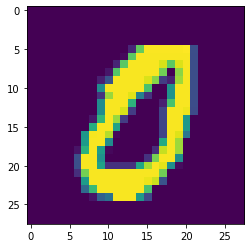

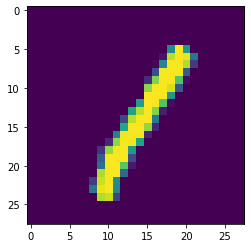

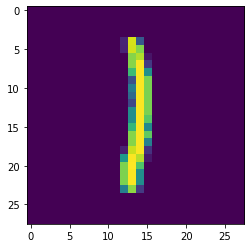

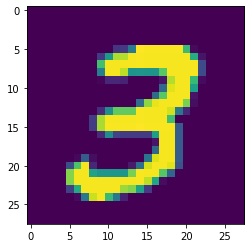

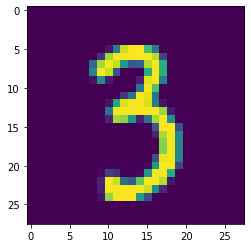

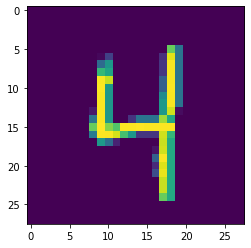

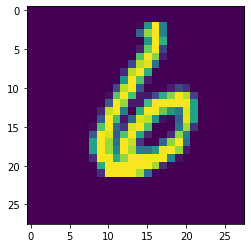

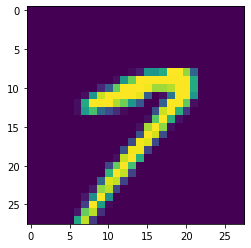

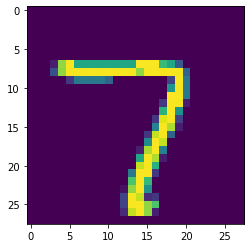

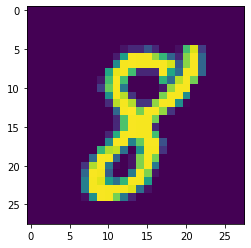

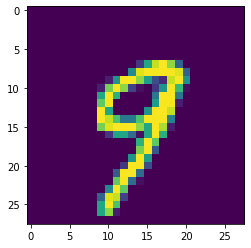

In [252]:
import matplotlib.pyplot as plt

for digit in min_clusters:
    plt.imshow(np.array(new_train_data.iloc[int(digit)]).reshape(28,28))
    plt.show()

In [249]:
min_clusters

array([ 10.,  16.,  22.,  36.,  46.,  58.,  79.,  89.,  91., 103., 116.])